<a href="https://colab.research.google.com/github/anirxudh/Deep-Learning-Lab-Tutorial-KTU/blob/main/Exp_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPERIMENT NO 10
## Anirudh S Nair
### Language translator using auto encoder decoder

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

2024-11-11 22:41:26.783600: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731345086.806049  172458 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731345086.812613  172458 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 22:41:26.836292: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Sentence loading and preparation

In [2]:
eng_sent = ["hello", "how are you", "good morning"]
hindi_sent = ["नमस्ते", "आप कैसे हैं", "सुप्रभात"]

In [3]:
eng_tokenizer={char: idx+1 for idx,char in enumerate(set(' '.join(eng_sent)))}
hindi_tokenizer={char: idx+1 for idx,char in enumerate(set(' '.join(hindi_sent)))}

In [4]:
eng_tokenizer

{'a': 1,
 'd': 2,
 'w': 3,
 'e': 4,
 'g': 5,
 'r': 6,
 'n': 7,
 'o': 8,
 'h': 9,
 'y': 10,
 'i': 11,
 ' ': 12,
 'm': 13,
 'u': 14,
 'l': 15}

In [5]:
hindi_tokenizer

{'र': 1,
 'े': 2,
 'स': 3,
 'न': 4,
 'ह': 5,
 'प': 6,
 'त': 7,
 'भ': 8,
 'ा': 9,
 'ै': 10,
 'आ': 11,
 '्': 12,
 'ं': 13,
 ' ': 14,
 'म': 15,
 'क': 16,
 'ु': 17}

In [6]:
max_eng_seq_len=max(len(i) for i in eng_sent)
max_hin_seq_len=max(len(i) for i in hindi_sent)

In [7]:
print(max_eng_seq_len)
print(max_hin_seq_len)

12
11


### Sentences to Sequences

In [8]:
def sent_to_seq(sentences, tokenizer, max_seq_len):
  sequences=np.zeros((len(sentences),max_seq_len))
  for i, sentences in enumerate(sentences):
    for j, char in enumerate(sentences):
      sequences[i,j]=tokenizer[char]
  return sequences

In [9]:
x_train=sent_to_seq(eng_sent, eng_tokenizer, max_eng_seq_len)
y_train=sent_to_seq(hindi_sent, hindi_tokenizer,max_hin_seq_len)
x_train=x_train.reshape((len(eng_sent),max_eng_seq_len,1))
y_train=y_train.reshape((len(hindi_sent),max_hin_seq_len,1 ))

# Encoder / Decoder Defining

In [10]:
latent_dim=256
encoder_inputs=layers.Input(shape=(max_eng_seq_len,1))
encoder_lstm=layers.LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c=encoder_lstm(encoder_inputs)
encoder_states=[state_h, state_c]

W0000 00:00:1731345088.872477  172458 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
decoder_inputs=layers.Input(shape=(max_hin_seq_len,1))
decoder_lstm=layers.LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _=decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense=layers.Dense(len(hindi_tokenizer)+1, activation='softmax')
decoder_outputs=decoder_dense(decoder_outputs)

# Model Building and Fitting

In [12]:
model=models.Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
y_train_ohe=to_categorical(y_train, num_classes=len(hindi_tokenizer)+1)

In [15]:
r=model.fit([x_train, y_train], y_train_ohe, epochs=100, batch_size=1)

Epoch 1/100


/home/aswin/Desktop/GIT/Deeplearning-using-Tensorflow/.venv/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_4']. Received: the structure of inputs=('*', '*')
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.1212 - loss: 2.9651
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2727 - loss: 2.5315
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2879 - loss: 2.2771
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4167 - loss: 1.8983
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4129 - loss: 1.8084
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3523 - loss: 1.9998
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6174 - loss: 1.4758
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5795 - loss: 1.4971
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6932 - loss: 1.3562
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5379 - loss: 1.4714 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6780 - loss: 1.0412
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7917 - loss: 0.9203


# Plotting

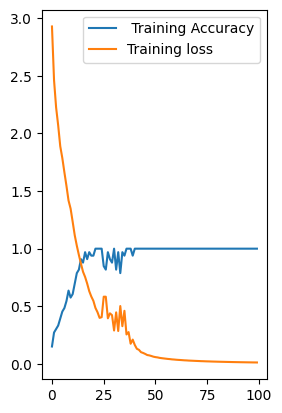

In [16]:
plt.subplot(1,2,1)
plt.plot(r.history['accuracy'], label=' Training Accuracy')
plt.plot(r.history['loss'], label= 'Training loss')
plt.legend()
plt.show()